In [ ]:
import numpy as np
file_path = "/home/roseyu/Python/log/"
data_file = "lorenz/tt_rnn/predict.npy"
test_rslt = np.load(file_path+data_file)
test_true = test_rslt[0]
test_pred = test_rslt[1]

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(test_pred[8000:9000,0])
plt.plot(test_true[8000:9000,0])

print(test_pred.shape)
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(test_true, test_pred)))

## Compare the randomized hyper-parameter tuning 

In [2]:
#data_path = "/home/roseyu/Python/log/lorenz/"
#exp="lorenz" start_time="05-02-17-00-25-36"
import numpy as np

def read_config(fstream):
    d = {}
    for line in fstream:
        line.rstrip()
        tokens = line.split('\t')
        for token in tokens:
            try:
                key, val = token.split(":")
                d[key] = float(val)                
            except ValueError:
                'error prop'
    return d
def print_forecast(start_time):
    i=0
    err_mat = np.ndarray((8,4))
    """pass in start-up of the experiments"""
    exps=["climate"]#"logistic","lorenz"] #,"traffic","climate"
    models = ["basic_rnn", "basic_lstm", "matrix_rnn", "tensor_rnn_einsum"] #"matrix_rnn", "tensor_rnn",

    ts = ""
    use_error = False

    for exp in exps:
#         for ts in range(10, 50, 5):
            j = 0
            for model in models:
                if use_error:
                    data_path = "/tmp/tensorRNN/log/"+exp+"/"+start_time+"/"+"ts_"+str(ts)+"/"+model+"/"
                else:
                    data_path = "/tmp/tensorRNN/log/"+exp+"/"+start_time+"/"+"/"+model+"/"
                file_name = "config_error.out"
                print(data_path)
                try:
                    with open(data_path+"/"+file_name,'rb') as fstream:
#                         for line in fstream:
#                             print(line)
                        config = read_config(fstream)
                        print config, model
                        err_mat[i,j]=config['test_error']
                        
                        j +=1
                        
                except IOError:
                    'no file'
                    
            i+=1
    return err_mat

### forecasting with error propagation

In [3]:
#print_forecast("05-02-17-13-55-40")
#print_forecast("05-02-17-23-53-19")
#print_forecast("05-07-17-19-09-09")
#print_forecast("05-03-17-19-06-14")
time_stamp= "05-13-17-16-59-56"
err_mat = print_forecast(time_stamp)
# err_mat[9,3] = err_mat[9,3]+ 0.02
# print(err_mat)
# np.save("/tmp/tensorRNN/log/logistic/"+time_stamp + "/test_err.npy",err_mat)

/tmp/tensorRNN/log/climate/05-13-17-16-59-56//basic_rnn/
/tmp/tensorRNN/log/climate/05-13-17-16-59-56//basic_lstm/
/tmp/tensorRNN/log/climate/05-13-17-16-59-56//matrix_rnn/
/tmp/tensorRNN/log/climate/05-13-17-16-59-56//tensor_rnn_einsum/


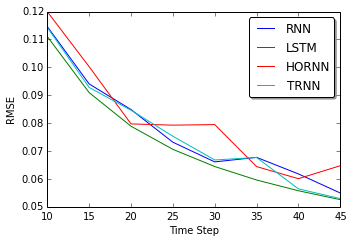

In [5]:
### plot the error
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5.25,3.5))
ax = fig.gca()
ax.plot(err_mat)
ax.set_xlabel("Time Step")
ax.set_ylabel("RMSE")
plt.setp(plt.gca(), 'xticklabels', [str(x) for x in np.arange(10,55,5)])
plt.legend(('RNN', 'LSTM', 'HORNN','TRNN'),
           'upper right', shadow=True, fancybox=True)


### hyper-parameter tuning for lstm

In [ ]:
import re
import numpy as np
model = "lstm"
err_list = []
hz_list = []
lr_list = []

        
for i in range(10):
    data_path = "/home/roseyu/Python/log/lorenz/basic_lstm_"+str(i)
    file_name = "config_error.out"
    
    try:
        with open(data_path+"/"+file_name,'rb') as fstream:
            #for line in fstream:
                #print(line)
            config = read_config(fstream)
            print config
            lr_list.append(config['learning_rate'])
            hz_list.append(config['hidden_size'])
            err_list.append(config['test_error'])
    except IOError:
        'no file'


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

lr = np.asarray(lr_list)
hz = np.asarray(hz_list)
err = np.asarray(err_list)

order = np.argsort(lr)
lr = lr[order]
err = err[order]
hz = hz[order]

plt.plot(lr[hz==128], err[hz==128])
plt.plot(lr[hz==256], err[hz==256])
plt.plot(lr[hz==64], err[hz==64])

print err